 ## $$\text{Variational Monte Carlo}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import pandas as pd

def local_energy(x, alpha):
    return alpha**0.5/np.pi**0.25*np.exp(-x**2*alpha**2/2)

plt.rcParams.update({
    "font.family":"Georgia"

})

$\text{Libraries used in ipynb file has to be installed through pip install if required libraries are not there}$

### $$\text{Variational Monte Carlo for Hydrogen Atom Wavefunction}$$ 

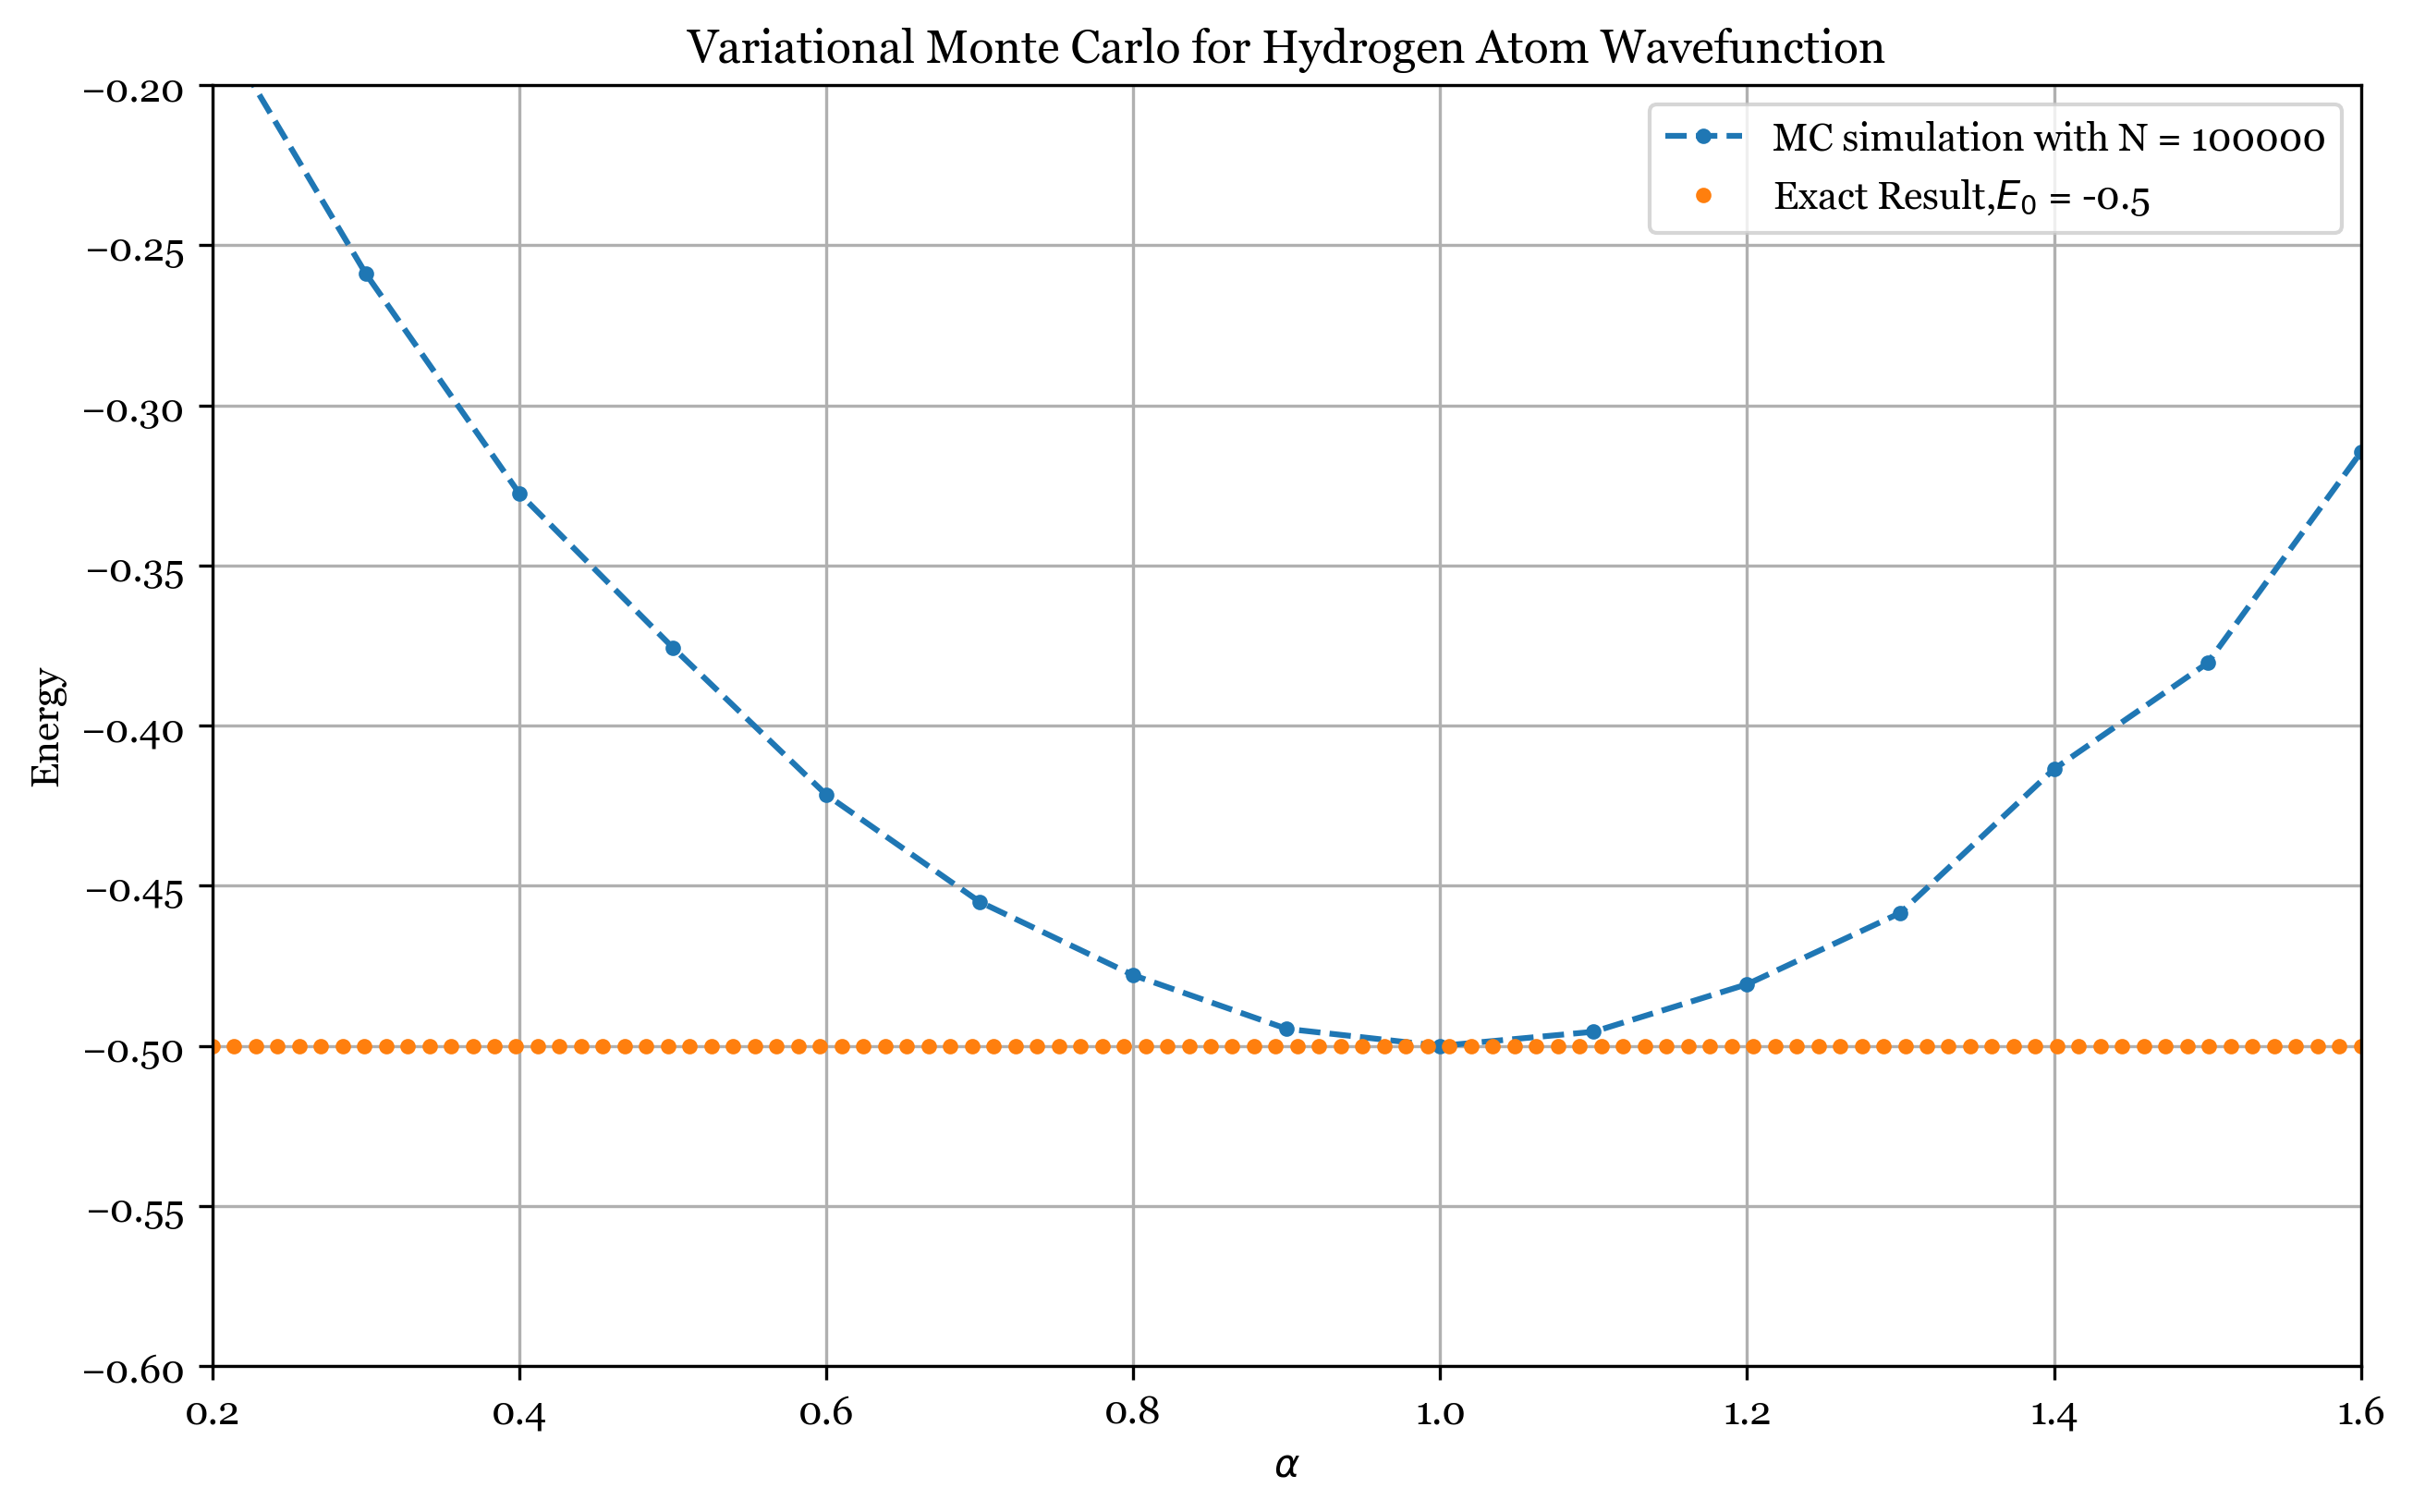

    alpha  Mean Energy(E)  Variance(E)
0     0.2       -0.178327     0.028545
1     0.3       -0.258836     0.038951
2     0.4       -0.327460     0.158207
3     0.5       -0.375590     0.060462
4     0.6       -0.421551     0.055517
5     0.7       -0.455015     0.044228
6     0.8       -0.477908     0.023305
7     0.9       -0.494666     0.008894
8     1.0       -0.500000     0.000000
9     1.1       -0.495584     0.011715
10    1.2       -0.480758     0.052085
11    1.3       -0.458444     0.177277
12    1.4       -0.413562     0.536498
13    1.5       -0.380463     0.487248
14    1.6       -0.314570     1.000661


In [2]:
@numba.njit
def trial_wave_func_2(x,alpha):
    return alpha*x*np.exp(-alpha*x)

@numba.njit
def hydrogen_energy(x, alpha):
    return -1/x - alpha/2*(alpha - 2/x)

@numba.njit
def exact_energy(alpha):
    return -0.5 + 0*alpha

@numba.njit
def metropolis_sample(alpha,step,mcs):
    x_list = [np.random.uniform(0, step)]
    for _ in range(mcs):
        delta_x = np.random.uniform(-1,1)*step
        x_new = x_list[-1] + delta_x
        prob_ratio = trial_wave_func_2(x_new, alpha)**2/trial_wave_func_2(x_list[-1], alpha)**2
        if prob_ratio > np.random.uniform(0,1) and x_new > 0 :
            x_list.append(x_new)
        else:
            x_list.append(x_list[-1]) 
    return x_list


mcs = int(1e5)
step_size = 2
mean_energy = []
var_energy = []
alpha_list_1 = np.linspace(0.2, 1.6,15)
alpha_list_2 =np.linspace(0.2,1.6,100)

exact_energy_list = [exact_energy(i) for i in alpha_list_2]

for alpha in alpha_list_1:
    X_list = np.array(metropolis_sample(alpha,step_size,mcs))
    var_e = np.var(hydrogen_energy(X_list,alpha)[mcs//2:])
    m_e = np.mean(hydrogen_energy(X_list,alpha)[mcs//2:])
    mean_energy.append(m_e)
    var_energy.append(var_e)
 
data = {
    'alpha':alpha_list_1,
    'Mean Energy(E)':mean_energy,
    'Variance(E)':var_energy
} 
df = pd.DataFrame(data)


    
plt.figure(figsize=(10,6),dpi= 300)
plt.plot(alpha_list_1,mean_energy,'--.',label='MC simulation with N = 100000')
plt.plot(alpha_list_2,exact_energy_list,'.',label = 'Exact Result,$E_0$ = -0.5')
plt.grid()
plt.title('Variational Monte Carlo for Hydrogen Atom Wavefunction')
plt.ylim(-0.6,-0.2)
plt.xlim(0.2,1.6)
plt.xlabel('$\\alpha$')
plt.ylabel('Energy')
plt.savefig('ha.pdf',dpi = 300)
plt.legend()
plt.show()


print(df)